## This tutorial is an introduction to Convolutional Neural Networks using TensorFlow 2.x Keras API. The dataset that we will work it is the Cifar10 dataset, a dataset of images from 10 different classes, and we will use a Sequential CNN to identify the class of an image.

In [1]:
!pip install tensorflow

### Importing necessary libraries:

In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

### Data preprocessing

The following module goes over the steps to preprocess the CIFAR10 dataset for our purposes.

#### Loading the Data:

The first step isto load the cifar 10 dataset from keras datasets.

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


*   x_train is the dataset of 32x32 color images of objects that the model will be trained on.

* y_train is the dataset of labels that correspond to x_train.

* x_test is the dataset of 32x32 color images of objects that the model will be tested on.

* y_test is the dataset of labels that correspond to x_test.

In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()

The following Classes are present:
Classes:

0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

Let's see how many images each Classes contain.

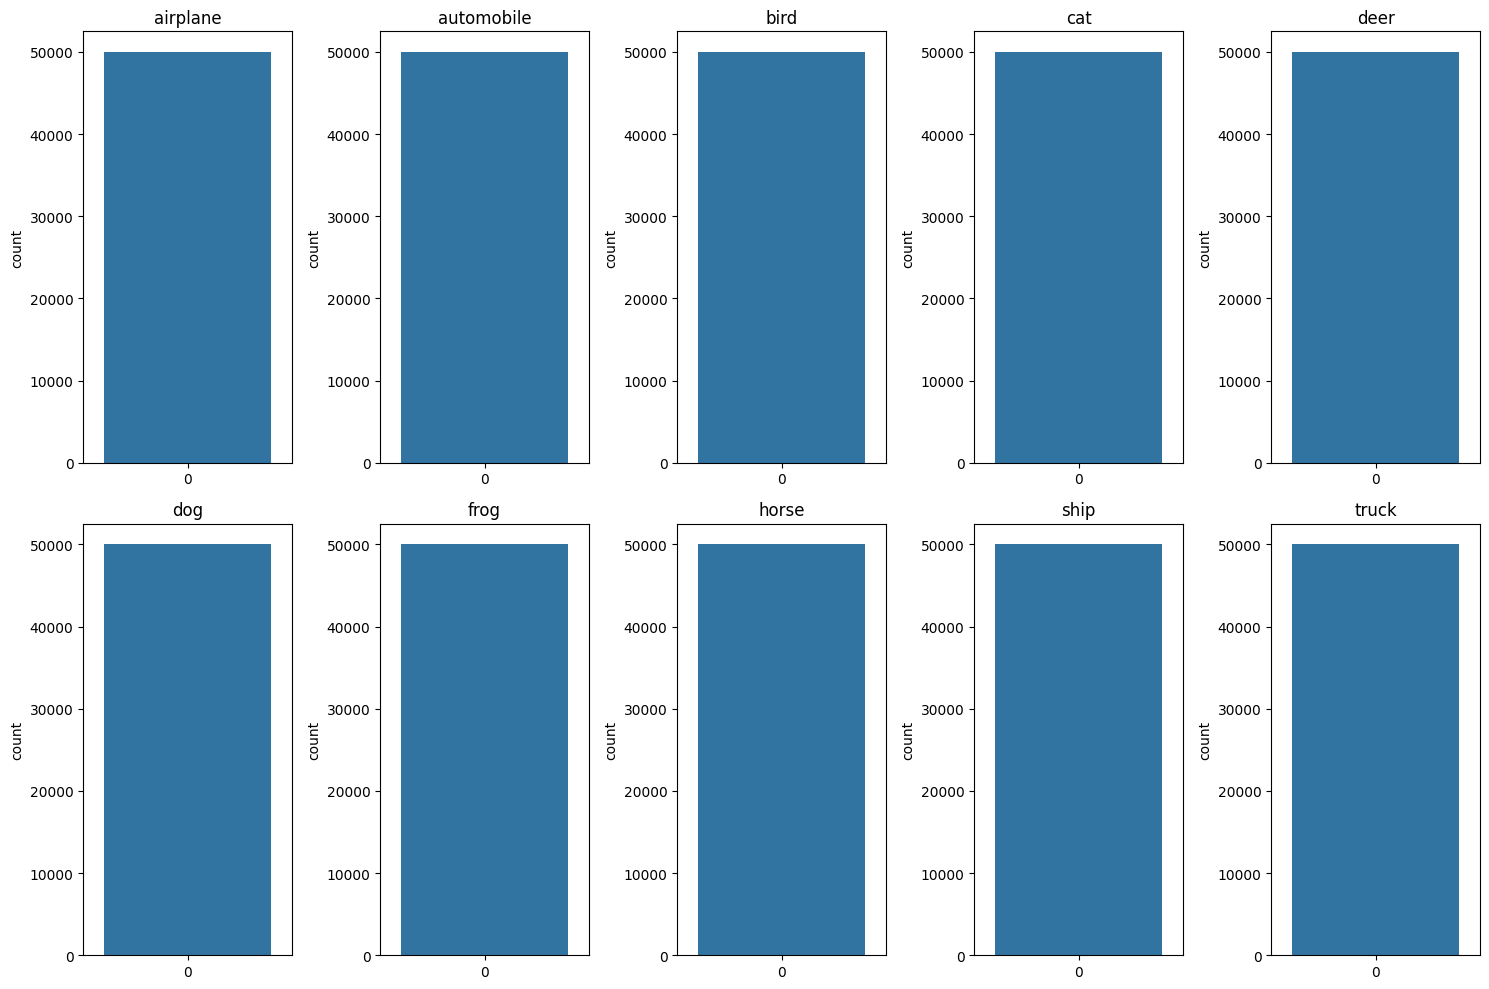

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15, 10))

for i, class_name in enumerate(classes):
    plt.subplot(2, 5, i+1)
    sns.countplot(y_train.flatten())
    plt.title(class_name)

plt.tight_layout()
plt.show()

Checking for null values:

In [12]:
np.isnan(x_train).any()

False

In [13]:
np.isnan(x_test).any()

False

Since there are no null values, ignoring the preprocessing steps.

### Normalization and Reshaping:

Since the values in our x_train dataset are 32x32 color images, our input shape must be specified so that our model will know what is being inputed.

The first convolution layer expects a single 50000x32x32x3 tensor instead of 50000 32x32x3 tensors.

For the CIFAR10 dataset, we want each value to be between 0.0 and 1.0. As all values originally fall under the 0.0-255.0 range, divide by 255.0.

In [14]:
input_shape = (32, 32, 3)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],
                          x_train.shape[2], 3)

x_train = x_train / 255.0

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],
                          x_test.shape[2], 3)

x_test = x_test / 255.0

### Label Encoding:

The labels for the training and the testing dataset are currently categorical and is not continuous. To include categorical dataset in our model, our labels should be converted to one-hot encodings.

In [16]:
y_train = tf.one_hot(y_train.astype(np.int32), depth = 10)
y_test = tf.one_hot(y_test.astype(np.int32), depth = 10)

In [17]:
y_train[1]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

### Let's see some visualizations:

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


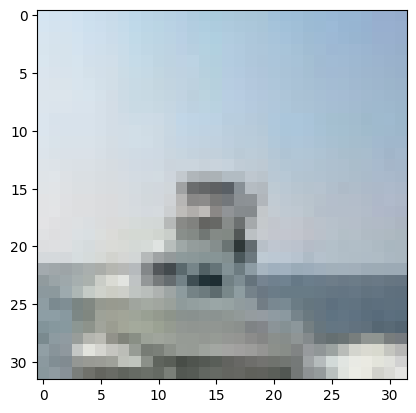

In [18]:
plt.imshow(x_train[100])
print(y_train[100])

Looks like a ship. The one-hot encoding vector holds the value of the ship class.

## CNN Modelling

### Defining the model first:

In [19]:
batch_size = 32
num_classes = 10
epochs = 100

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding = 'same',
                           input_shape = x_train.shape[1:],
                           activation = 'relu'),
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding = 'same',
                           input_shape = x_train.shape[1:],
                           activation = 'relu'),
    tf.keras.layers.Conv2D(64, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation = 'softmax'),
])

initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['acc'])

#### Let's see what have we done in the above code:

* Conv2D layers are convolutions. Each filter (32 in the first two convolution layers and 64 in the next two convolution layers) transforms a part of the image (5x5 for the first two Conv2D layers and 3x3 for the next two Conv2D layers). The transformation is applied on the whole image.

* MaxPool2D is a downsampling filter. It reduces a 2x2 matrix of the image to a single pixel with the maximum value of the 2x2 matrix. The filter aims to conserve the main features of the image while reducing the size.

* Dropout is a regularization layer. In our model, 25% of the nodes in the layer are randomly ignores, allowing the network to learn different features. This prevents overfitting.

* relu is the rectifier, and it is used to find nonlinearity in the data. It works by returning the input value if the input value >= 0. If the input is negative, it returns 0.

* Flatten converts the tensors into a 1D vector.

* The Dense layers are an artificial neural network (ANN). The last layer returns the probability that an image is in each class (one for each digit).

* loss function used is: categorical_crossentropy.

* Since the decay parameter has been deprecated in the new Keras optimizer, We have used the ***tf.keras.optimizers.schedules*** module to achieve a similar effect.

Let's now fit the training data, just like normal machine learning.

In [23]:
history = model.fit(x_train, y_train, batch_size = batch_size,
                    epochs = epochs)

Epoch 1/100
1563/1563 [==============================] - 26s 6ms/step - loss: 1.7947 - acc: 0.3470
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4839 - acc: 0.4635
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3370 - acc: 0.5210
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2370 - acc: 0.5599
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1559 - acc: 0.5907
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0938 - acc: 0.6139
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0416 - acc: 0.6323
Epoch 8/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9964 - acc: 0.6494
Epoch 9/100
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9535 - acc: 0.6664
Epoch 10/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9216 - acc: 0.6780
Epoch 11/100
156

### Let's check the accuracy of the model:

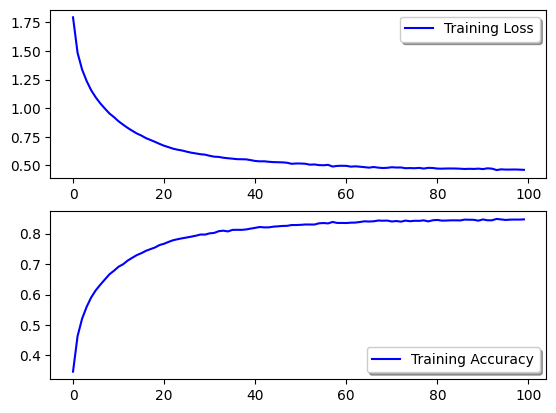

In [24]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

The accuracy increases over time and the loss decreases over time. However, the accuracy of our validation set seems to slightly decrease towards the end even thought our training accuracy increased. Running the model for more epochs might cause our model to be susceptible to overfitting.

### Predictions:

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.6435 - acc: 0.7944


Accuracy of almost 80%. Not bad.

### Confusion Matrix

In [26]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 1s 3ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

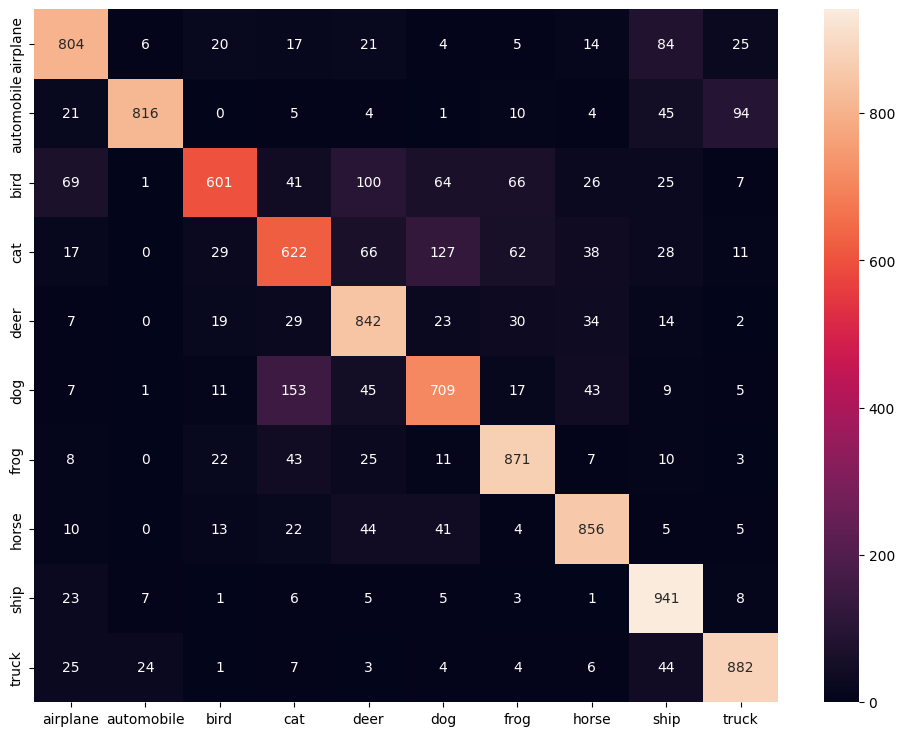

In [27]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)